- **Project**: UAS Pembelajaran Mesin
- **Created**: Sun, 18th Dec 2022 1:15:24 PM
- **Author**: F. Waskito
- **Reference**: Randerson. (July 12, 2019). *Classifiy Images Using Convolutional Neural Network & Python*. Medium.com. [link](https://randerson112358.medium.com/classify-images-using-convolutional-neural-networks-python-a89cecc8c679)

***

**Impor pustaka yang dibutuhkan**

In [1]:
# Impor pustaka yang dibutuhkan
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from keras import layers
from keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt
import os

plt.style.use('ggplot')

***Outset***

In [2]:
# Tensorflow flag (Log all messages except INFO and WARNING)
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

In [3]:
# Mengetahui current working directory
os.getcwd()

'/content'

***Load data***

In [4]:
from keras.datasets import cifar10
# Pre-packaged dataset cifar10 
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

170498071/170498071 [==============================] - 4s 0us/step


### **Analisis Data**

**Menampilkan tipe data dari sampel latih dan uji**

In [5]:
print('X_train type:', type(X_train))
print('y_train type:', type(y_train))
print('X_test type:', type(X_test))
print('y_test type:', type(y_test))

X_train type: <class 'numpy.ndarray'>
y_train type: <class 'numpy.ndarray'>
X_test type: <class 'numpy.ndarray'>
y_test type: <class 'numpy.ndarray'>


**Menampilkan *shape* dari sampel latih dan uji**

In [6]:
print('X_train shape:', X_train.shape)
print('y_train shape:', y_train.shape)
print('X_test shape:', X_test.shape)
print('y_test shape:', y_test.shape)

X_train shape: (50000, 32, 32, 3)
y_train shape: (50000, 1)
X_test shape: (10000, 32, 32, 3)
y_test shape: (10000, 1)


**Menelusuri salah satu citra**

In [7]:
index = 13

print(X_train[index])  # citra urutan ke-14 pada sampel latih

[[[ 17   3   2]
  [ 17   3   2]
  [ 17   2   1]
  ...
  [ 23  13  11]
  [ 22  12  10]
  [ 19   9   7]]

 [[ 18   4   3]
  [ 18   4   3]
  [ 18   4   3]
  ...
  [ 24  14  12]
  [ 23  13  11]
  [ 22  12  10]]

 [[ 18   4   3]
  [ 18   4   3]
  [ 19   5   4]
  ...
  [ 24  14  12]
  [ 23  13  11]
  [ 23  13  11]]

 ...

 [[217 214 223]
  [226 219 227]
  [210 201 213]
  ...
  [ 33  24  17]
  [ 32  23  16]
  [ 33  24  17]]

 [[219 215 230]
  [222 215 229]
  [214 208 225]
  ...
  [ 35  26  19]
  [ 34  25  18]
  [ 33  24  17]]

 [[210 208 223]
  [221 216 229]
  [215 212 227]
  ...
  [ 36  27  20]
  [ 34  25  18]
  [ 32  23  16]]]


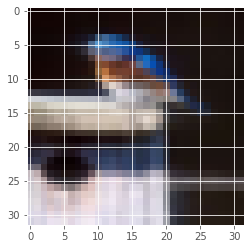

In [8]:
# Menampilkan citra sebelumnya secara visual
img = plt.imshow(X_train[index])

In [9]:
# Mengetahui label (bertipe kategorik-numerik) dari citra
print('The image label is: ', y_train[index])

The image label is:  [2]


In [10]:
# Buat representasi label terhadap kelas (kategorik-string)
label_classes = ['airplane', 'automobile', 'bird', 'cat', 'deer', 
                'dog', 'frog', 'horse', 'ship', 'truck']

print('Number ', 'class')
print('-------------------------')
for i in range(len(label_classes)):
    print(str(i).ljust(7), str(label_classes[i]).ljust(5))

Number  class
-------------------------
0       airplane
1       automobile
2       bird 
3       cat  
4       deer 
5       dog  
6       frog 
7       horse
8       ship 
9       truck


In [11]:
# Tampilkan kelas dari citra sebelumnya
print('The image class is: ', label_classes[y_train[index][0]])

The image class is:  bird


### **Praprosess**

***Label encoding* (dengan *one-hot encoding*)**

In [12]:
y_train_one_hot = to_categorical(y_train)
y_test_one_hot = to_categorical(y_test)

# Hasil encoding pada label sampel latih
print(y_train_one_hot)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 ...
 [0. 0. 0. ... 0. 0. 1.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]]


In [13]:
# Hasil encoding dari label citra urutan ke-14 pada sampel latih
print('The one-hot label is: ', y_train_one_hot[index])

The one-hot label is:  [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]


**Normalisasi Citra**

In [14]:
# nilai dan tipe data kanal sebelum normasisasi
print(X_train[index][0][0][0])
print(type(X_train[index][0][0][0]))

17
<class 'numpy.uint8'>


In [15]:
# ubah nilai citra pada sampel latih dan uji 
# dari interval [0,255] menjadi ke [0,1]
X_train = X_train / 255
X_test = X_test / 255

print(X_train)

[[[[0.23137255 0.24313725 0.24705882]
   [0.16862745 0.18039216 0.17647059]
   [0.19607843 0.18823529 0.16862745]
   ...
   [0.61960784 0.51764706 0.42352941]
   [0.59607843 0.49019608 0.4       ]
   [0.58039216 0.48627451 0.40392157]]

  [[0.0627451  0.07843137 0.07843137]
   [0.         0.         0.        ]
   [0.07058824 0.03137255 0.        ]
   ...
   [0.48235294 0.34509804 0.21568627]
   [0.46666667 0.3254902  0.19607843]
   [0.47843137 0.34117647 0.22352941]]

  [[0.09803922 0.09411765 0.08235294]
   [0.0627451  0.02745098 0.        ]
   [0.19215686 0.10588235 0.03137255]
   ...
   [0.4627451  0.32941176 0.19607843]
   [0.47058824 0.32941176 0.19607843]
   [0.42745098 0.28627451 0.16470588]]

  ...

  [[0.81568627 0.66666667 0.37647059]
   [0.78823529 0.6        0.13333333]
   [0.77647059 0.63137255 0.10196078]
   ...
   [0.62745098 0.52156863 0.2745098 ]
   [0.21960784 0.12156863 0.02745098]
   [0.20784314 0.13333333 0.07843137]]

  [[0.70588235 0.54509804 0.37647059]
   [0.6

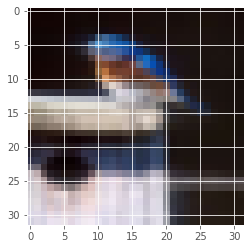

In [16]:
# citra ke-14 setelah normalisasi
img = plt.imshow(X_train[index])

In [17]:
# nilai dan tipe data kanal setelah normasisasi
print(X_train[index][0][0][0])
print(type(X_train[index][0][0][0]))

0.06666666666666667
<class 'numpy.float64'>


### **Pemodelan**

**Bangun arsitektur *Convolutional Neural Network***




In [18]:
model = Sequential()
# Convolutional and pooling layers
model.add(Conv2D(32, (5, 5), activation='relu', input_shape=(32, 32, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
# Neural Network and dropout layers
model.add(Dense(1000, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(500, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(250, activation='relu'))
model.add(Dense(10, activation='softmax'))

print('Model summary:\n')
model.summary()

Model summary:

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        2432      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 10, 10, 64)        51264     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dense (Dense)               (None, 1000

**Kompilasi model**

In [19]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

### **Pelatihan Model**

In [20]:
hist = model.fit(X_train, 
                 y_train_one_hot,
                 batch_size=256, 
                 epochs=10, 
                 validation_split=0.2)

Epoch 1/10
157/157 [==============================] - 11s 15ms/step - loss: 1.7848 - accuracy: 0.3288 - val_loss: 1.4418 - val_accuracy: 0.4702
Epoch 2/10
157/157 [==============================] - 2s 12ms/step - loss: 1.3740 - accuracy: 0.4997 - val_loss: 1.2327 - val_accuracy: 0.5578
Epoch 3/10
157/157 [==============================] - 2s 12ms/step - loss: 1.1865 - accuracy: 0.5746 - val_loss: 1.0841 - val_accuracy: 0.6143
Epoch 4/10
157/157 [==============================] - 2s 12ms/step - loss: 1.0640 - accuracy: 0.6204 - val_loss: 1.0355 - val_accuracy: 0.6294
Epoch 5/10
157/157 [==============================] - 2s 12ms/step - loss: 0.9803 - accuracy: 0.6551 - val_loss: 0.9695 - val_accuracy: 0.6595
Epoch 6/10
157/157 [==============================] - 2s 12ms/step - loss: 0.8847 - accuracy: 0.6898 - val_loss: 0.9549 - val_accuracy: 0.6711
Epoch 7/10
157/157 [==============================] - 2s 13ms/step - loss: 0.8029 - accuracy: 0.7161 - val_loss: 0.8893 - val_accuracy: 0.696

### **Evaluasi Model**

In [21]:
# Evaluasi model tehadap sampel uji
accuracy = model.evaluate(X_test, y_test_one_hot)[1]

print('Accuracy score:', accuracy)

313/313 [==============================] - 1s 3ms/step - loss: 0.9001 - accuracy: 0.6970
Accuracy score: 0.6970000267028809


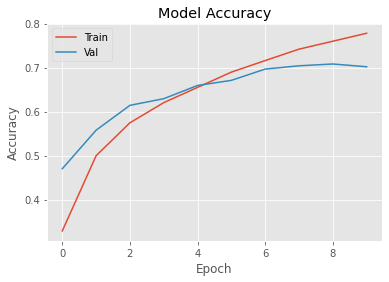

In [22]:
# Memvisualisasikan akurasi dari hasil pelatihan
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

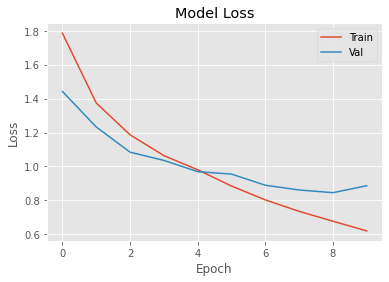

In [23]:
# Memvisualisasikan kerugian (loss) dari hasil pelatihan
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

### **Pengujian Model dengan Citra Unggahan**

**Unggah citra uji jika menggunakan Google Colab**

In [24]:
from google.colab import files

uploaded = files.upload()
uploaded_file_name = list(uploaded.keys())[0]

print('\n> Isi current working directory:')
for file in os.listdir(os.getcwd()):
    print(file)

Saving airplane_0006.jpg to airplane_0006.jpg

> Isi current working directory:
.config
airplane_0006.jpg
sample_data


**Uaggah citra uji jika menggunakan IDE lokal**

In [2]:
import shutil
import tkinter as tk
from tkinter import filedialog as fd

def upload_file():
    root = tk.Tk()
    root.wm_withdraw()
    curr_directory = os.getcwd()
    source_path = fd.askopenfilename(initialdir=curr_directory, 
                                    title="Select Image", 
                                    filetypes=[('Image Files', '*.jpg')])
    root.destroy()  # Tutup root Tkinter dialog

    uploaded_file_name = os.path.basename(source_path)
    uploaded_path = os.path.join(curr_directory, uploaded_file_name)
    shutil.copyfile(source_path, uploaded_path)

    return uploaded_file_name

uploaded_file_name = upload_file()

# Tampilkan isi current working directory terbaru
print('\n> Isi "cwd":')
for file in os.listdir(os.getcwd()):
    print(file)


> Isi "cwd":
README.md
airplane_0006.jpg
185314098.ipynb
.git
support.py
185314098.py
base_code.ipynb


**Baca dan tampilkan citra uji unggahan**


Nama file citra unggahan: "airplane_0006.jpg" 



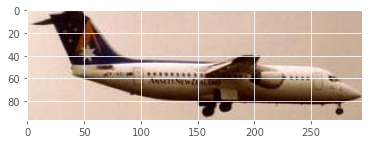

In [26]:
print(f'\nNama file citra unggahan: "{uploaded_file_name}" \n')
# Membaca file unggahan
new_image = plt.imread(uploaded_file_name)

# Tampilkan citra unggahan secara visual
img = plt.imshow(new_image)

**Transformasi citra uji unggahan**

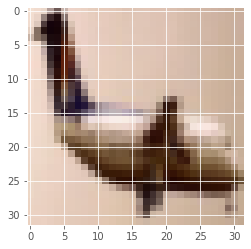

In [27]:
from skimage.transform import resize
# Ubah ukuran citra sehingga sesuai dengan input layer pada model
resized_image = resize(new_image, (32, 32, 3))

img = plt.imshow(resized_image)

**Buat prediksi**

In [28]:
predictions = model.predict(np.array([resized_image]))

1/1 [==============================] - 0s 129ms/step


**Hasil prediksi**

In [29]:
predictions

array([[4.4766262e-01, 4.6912261e-04, 4.9054179e-01, 1.4339016e-02,
        2.4130177e-02, 2.8569079e-03, 6.8374993e-03, 9.3571009e-04,
        1.0518496e-02, 1.7086356e-03]], dtype=float32)

In [30]:
# Urutkan probabilitas hasil prediksi yang berkesesuaian terhadap kelas
list_index = [0,1,2,3,4,5,6,7,8,9]
x = predictions

for i in range(10):
  for j in range(10):
    if x[0][list_index[i]] > x[0][list_index[j]]:
      temp = list_index[i]
      list_index[i] = list_index[j]
      list_index[j] = temp

print(list_index)

[2, 0, 4, 3, 8, 6, 5, 9, 7, 1]


In [31]:
# Tampilkan 5 kelas hasil prediksi dengan probabilitas tertinggi
for i in range(0, 5):
  print(label_classes[list_index[i]].ljust(10),':', 
        round(predictions[0][list_index[i]] * 100, 2),'%')

bird       : 49.05 %
airplane   : 44.77 %
deer       : 2.41 %
cat        : 1.43 %
ship       : 1.05 %


### **Pengujian Model dengan Citra pada Sampel Uji Cifar10**

**1. Pengujian data tunggal**


The random index of the test image is: 4075
The actual class of the test image is: bird 



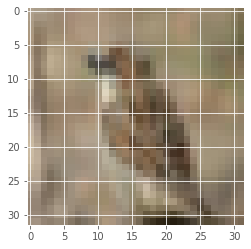

In [32]:
import random
# Ambil citra uji secara acak
rand_test_index = random.randint(0, len(X_test))
rand_test_image = X_test[rand_test_index]
rand_test_class = label_classes[y_test[rand_test_index][0]]

print('\nThe random index of the test image is:', rand_test_index)
print('The actual class of the test image is:', rand_test_class, '\n')
img = plt.imshow(rand_test_image)

Buat prediksi

In [33]:
rand_test_image = np.reshape(rand_test_image, (1, 32, 32, 3))

predictions = model.predict(rand_test_image)

1/1 [==============================] - 0s 28ms/step


Hasil prediksi

In [34]:
predictions

array([[4.7992970e-04, 8.0922864e-06, 9.2305350e-01, 1.8406160e-02,
        3.1905700e-02, 8.7437797e-03, 1.6124243e-02, 1.1282228e-03,
        7.2236107e-05, 7.8148099e-05]], dtype=float32)

In [35]:
# Urutkan probabilitas hasil prediksi dari terbesar ke terkecil
list_index = [0,1,2,3,4,5,6,7,8,9]
x = predictions

for i in range(10):
  for j in range(10):
    if x[0][list_index[i]] > x[0][list_index[j]]:
      temp = list_index[i]
      list_index[i] = list_index[j]
      list_index[j] = temp

print(list_index)

[2, 4, 3, 6, 5, 7, 0, 9, 8, 1]


In [36]:
# Tampilkan 5 kelas hasil prediksi dengan probabilitas tertinggi
for i in range(0, 5):
  print(label_classes[list_index[i]].ljust(10),':', 
        round(predictions[0][list_index[i]] * 100, 2),'%')

bird       : 92.31 %
deer       : 3.19 %
cat        : 1.84 %
frog       : 1.61 %
dog        : 0.87 %


**2. Pengujian seluruh data uji**

Buat prediksi

In [37]:
predictions = model.predict(X_test)

313/313 [==============================] - 1s 2ms/step


Hasil Prediksi

In [38]:
# Untuk setiap satu hasil prediksi, ambil label prediksi pada indeks
# berkesesuaian yang memiliki probabilitas tertinggi
y_predict = []
for probabilities in predictions:
  y_predict.append(np.argmax(probabilities))

In [39]:
from sklearn import metrics as mr

print('Number of test images:', len(X_test))
print('\nConfusion matrix:\n', mr.confusion_matrix(y_test, y_predict))
print('\nClassification report:\n',
      mr.classification_report(y_test, y_predict))

Number of test images: 10000

Confusion matrix:
 [[729  21  62  20  28   4  20  11  77  28]
 [ 11 868  11   6   4   3  21   3  17  56]
 [ 53   8 645  53  93  34  74  23  11   6]
 [ 13  13 104 457 106 120 126  33  10  18]
 [ 19   2 100  62 683  18  57  47  10   2]
 [ 11   4  93 177  85 511  53  48   7  11]
 [  2   5  54  33  47   8 830   7   6   8]
 [ 14   3  47  37 104  43  15 723   1  13]
 [ 63  52  15  15  11   9  10   2 803  20]
 [ 34 128  13  12  12  11  16  14  39 721]]

Classification report:
               precision    recall  f1-score   support

           0       0.77      0.73      0.75      1000
           1       0.79      0.87      0.83      1000
           2       0.56      0.65      0.60      1000
           3       0.52      0.46      0.49      1000
           4       0.58      0.68      0.63      1000
           5       0.67      0.51      0.58      1000
           6       0.68      0.83      0.75      1000
           7       0.79      0.72      0.76      1000
        

***

**Simpan Model**

In [40]:
model.save('model/185314098_cnn_model.h5')

print('> Isi "cwd/model":')
for file in os.listdir(os.getcwd()+"/model"):
    print(file)

> Isi "cwd/model":
185314098_cnn_model.h5
